In [3]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [4]:
!ls

Airline Delays, 2014-2018.ipynb index.html
README.md                       junedelays.xlsx
airline_delay_causes.csv        simple.html
flightdelays.csv                styles
images                          templates copy.ai


In [5]:
df = pd.read_csv("airline_delay_causes.csv")

In [5]:
#Delays/cancellations over time - worst seasons to travel (calendar heatmap)
#Bar chart showing average delays per season in 2018
#Bar chart showing the airlines with longest delays in 2018
#Slope chart showing 

In [6]:
df.dtypes

year                     int64
 month                   int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
 weather_ct            float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
 arr_delay             float64
 carrier_delay         float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object

In [7]:
df=df.rename(columns={' month': 'month',
                     ' weather_ct': 'weather_ct',
                     ' arr_delay': 'arr_delay',
                     ' carrier_delay': 'carrier_delay'})

In [8]:
df = df.drop(['carrier', 'airport_name'], axis=1)

In [9]:
df = df[(df.carrier_name == 'United Air Lines Inc.') |
                        (df.carrier_name == 'JetBlue Airways') |
                        (df.carrier_name == 'ExpressJet Airlines Inc.') |
                        (df.carrier_name == 'Endeavor Air Inc.') |
                        (df.carrier_name == 'Delta Air Lines Inc.') |
                        (df.carrier_name == 'Republic Airline') |
                        (df.carrier_name == 'American Airlines Inc.') |
                        (df.carrier_name == 'Southwest Airlines Co.') |
                        (df.carrier_name == 'Envoy Air') |
                        (df.carrier_name == 'US Airways Inc.') |
                        (df.carrier_name == 'SkyWest Airlines Inc.')]

In [10]:
df = df[(df.year==2018) | (df.year==2017) | (df.year==2016) | (df.year==2015) | (df.year==2014)]

In [11]:
df.head(10)

,year,month,carrier_name,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
1156,2014,1,American Airlines Inc.,JFK,1139.0,233.0,68.65,11.21,78.74,0.00,74.40,74.0,13.0,15754.0,3957.0,1575.0,3431.0,0.0,6791.0
1157,2014,1,JetBlue Airways,JFK,3342.0,1010.0,289.30,27.47,235.20,1.43,456.60,438.0,29.0,88507.0,22678.0,4308.0,14623.0,77.0,46821.0
1158,2014,1,Delta Air Lines Inc.,JFK,1637.0,411.0,117.63,27.13,165.08,0.00,101.16,96.0,24.0,39000.0,11001.0,7169.0,11161.0,0.0,9669.0
1161,2014,1,ExpressJet Airlines Inc.,JFK,104.0,37.0,8.19,2.00,12.88,0.00,13.93,15.0,1.0,2253.0,392.0,155.0,659.0,0.0,1047.0
1162,2014,1,United Air Lines Inc.,JFK,410.0,88.0,31.17,3.00,35.84,0.00,17.99,22.0,4.0,6021.0,1622.0,855.0,1909.0,0.0,1635.0
1163,2014,1,US Airways Inc.,JFK,270.0,63.0,21.95,1.83,29.60,0.48,9.14,15.0,1.0,3170.0,1014.0,87.0,1337.0,17.0,715.0
1165,2014,2,American Airlines Inc.,JFK,1049.0,212.0,55.30,9.61,75.46,0.00,71.64,59.0,14.0,15830.0,3752.0,521.0,5378.0,0.0,6179.0
1166,2014,2,JetBlue Airways,JFK,3117.0,831.0,183.15,10.19,215.99,3.83,417.84,181.0,16.0,57737.0,10757.0,1258.0,15062.0,108.0,30552.0
1167,2014,2,Delta Air Lines Inc.,JFK,1481.0,299.0,76.19,13.25,121.94,0.00,87.63,68.0,11.0,24367.0,6661.0,4255.0,6730.0,0.0,6721.0
1168,2014,2,ExpressJet Airlines Inc.,JFK,104.0,23.0,6.20,0.53,7.65,0.00,8.62,18.0,0.0,2028.0,513.0,18.0,749.0,0.0,748.0


In [12]:
seasons = {12:"winter",1:'winter',2:'winter',3:'spring', 4:'spring', 5:'spring', 6:'summer', 7:'summer', 8:'summer', 9:'fall', 10:'fall', 11:'fall'}

In [13]:
df['seasons'] = df.month.copy()

In [14]:
df=df.replace({'seasons':seasons})

In [15]:
df.head()

,year,month,carrier_name,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,seasons
1156,2014,1,American Airlines Inc.,JFK,1139.0,233.0,68.65,11.21,78.74,0.00,74.40,74.0,13.0,15754.0,3957.0,1575.0,3431.0,0.0,6791.0,winter
1157,2014,1,JetBlue Airways,JFK,3342.0,1010.0,289.30,27.47,235.20,1.43,456.60,438.0,29.0,88507.0,22678.0,4308.0,14623.0,77.0,46821.0,winter
1158,2014,1,Delta Air Lines Inc.,JFK,1637.0,411.0,117.63,27.13,165.08,0.00,101.16,96.0,24.0,39000.0,11001.0,7169.0,11161.0,0.0,9669.0,winter
1161,2014,1,ExpressJet Airlines Inc.,JFK,104.0,37.0,8.19,2.00,12.88,0.00,13.93,15.0,1.0,2253.0,392.0,155.0,659.0,0.0,1047.0,winter
1162,2014,1,United Air Lines Inc.,JFK,410.0,88.0,31.17,3.00,35.84,0.00,17.99,22.0,4.0,6021.0,1622.0,855.0,1909.0,0.0,1635.0,winter


In [16]:
df.carrier_name.value_counts()

American Airlines Inc.      180
JetBlue Airways             180
Delta Air Lines Inc.        180
United Air Lines Inc.       142
ExpressJet Airlines Inc.    131
Southwest Airlines Co.      120
SkyWest Airlines Inc.        92
Envoy Air                    86
US Airways Inc.              54
Republic Airline             36
Endeavor Air Inc.            36
Name: carrier_name, dtype: int64

## Worst season to travel, 2014-2018

### Get percentage of how many arrival flights were delayed

In [17]:
df['ratio_delays'] = (df['arr_del15'] * 100)/(df['arr_flights'])

In [18]:
delays_peryear = df.pivot_table(columns='month', index='year', values='ratio_delays')#.reset_index()

In [19]:
df[(df.month==10)].year.value_counts()

2018    27
2014    23
2015    20
2017    18
2016    16
Name: year, dtype: int64

In [20]:
delays_peryear.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2014,26.452698,21.150026,21.186316,26.455394,30.728551,29.881349,26.791360,24.169356,20.381316,23.317427,21.663815,28.795335
2015,25.321078,31.906692,26.676894,18.687298,18.385870,27.721753,26.463736,19.766650,17.888018,16.963432,20.023279,24.698156
2016,20.635778,26.605740,23.789699,21.723522,27.745620,30.183919,31.313266,28.131719,19.628098,18.854435,23.903620,24.753474
2017,29.594075,21.979962,32.938438,31.836311,33.824678,32.653902,34.848652,26.519247,20.611011,24.126956,17.802932,27.303548
2018,25.133472,23.299938,23.075831,26.961435,25.618446,30.016625,30.108295,29.203772,25.813449,23.281667,28.267836,27.090787


([<matplotlib.axis.XTick at 0x11a7fcb00>,
 <a list of 12 Text xticklabel objects>)

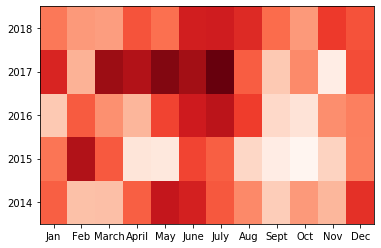

In [21]:
plt.pcolor(delays_peryear, cmap='Reds')

tick_labels = delays_peryear.index
tick_locations = np.arange(0.5, len(tick_labels), 1)
plt.yticks(tick_locations, tick_labels)

tick_labels = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', "Sept", "Oct", "Nov", "Dec"]
tick_locations = [0.5, 1.5,2.5,3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
plt.xticks(tick_locations, tick_labels)

# plt.savefig('delaysheatmapsample.pdf')

In [21]:
df.head()

,year,month,carrier_name,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,seasons,ratio_delays
1156,2014,1,American Airlines Inc.,JFK,1139.0,233.0,68.65,11.21,78.74,0.00,...,74.0,13.0,15754.0,3957.0,1575.0,3431.0,0.0,6791.0,winter,20.456541
1157,2014,1,JetBlue Airways,JFK,3342.0,1010.0,289.30,27.47,235.20,1.43,...,438.0,29.0,88507.0,22678.0,4308.0,14623.0,77.0,46821.0,winter,30.221424
1158,2014,1,Delta Air Lines Inc.,JFK,1637.0,411.0,117.63,27.13,165.08,0.00,...,96.0,24.0,39000.0,11001.0,7169.0,11161.0,0.0,9669.0,winter,25.106903
1161,2014,1,ExpressJet Airlines Inc.,JFK,104.0,37.0,8.19,2.00,12.88,0.00,...,15.0,1.0,2253.0,392.0,155.0,659.0,0.0,1047.0,winter,35.576923
1162,2014,1,United Air Lines Inc.,JFK,410.0,88.0,31.17,3.00,35.84,0.00,...,22.0,4.0,6021.0,1622.0,855.0,1909.0,0.0,1635.0,winter,21.463415


In [22]:
delays_peryear = df.pivot_table(columns='seasons', index='year', values='ratio_delays')#.reset_index()

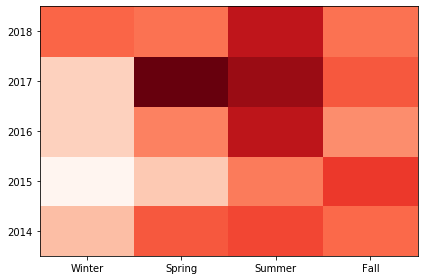

In [23]:
plt.pcolor(delays_peryear, cmap='Reds')

tick_labels = delays_peryear.index
tick_locations = np.arange(0.5, len(tick_labels), 1)
plt.yticks(tick_locations, tick_labels)

tick_labels = ['Winter', "Spring", "Summer", "Fall", ]
tick_locations = [0.5, 1.5,2.5,3.5]
plt.xticks(tick_locations, tick_labels)

plt.savefig('delaysheatmapseasons.pdf')
plt.tight_layout()

# Analysis 2018

In [25]:
df2 = df[(df.year == 2018)]

In [26]:
df2.head()

,year,month,carrier_name,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,seasons,ratio_delays
1499,2018,1,Envoy Air,JFK,217.0,42.0,9.55,2.02,16.47,0.00,...,19.0,1.0,2305.0,505.0,424.0,655.0,0.0,721.0,winter,19.354839
1502,2018,1,Republic Airline,JFK,249.0,46.0,11.78,1.44,17.69,0.00,...,27.0,1.0,3002.0,874.0,200.0,584.0,0.0,1344.0,winter,18.473896
1503,2018,1,Endeavor Air Inc.,JFK,2082.0,309.0,72.06,23.87,117.64,0.00,...,223.0,5.0,31968.0,9354.0,4816.0,10127.0,0.0,7671.0,winter,14.841499
1504,2018,1,American Airlines Inc.,JFK,1369.0,221.0,70.18,5.08,99.62,2.54,...,80.0,6.0,19095.0,6825.0,1405.0,6872.0,77.0,3916.0,winter,16.143170
1506,2018,1,JetBlue Airways,JFK,3401.0,896.0,250.15,10.44,244.44,0.78,...,255.0,26.0,81440.0,21734.0,1711.0,16838.0,82.0,41075.0,winter,26.345193


In [27]:
df2.groupby(by='airport').arr_delay.sum()

airport
EWR    3106165.0
JFK    2065288.0
LGA    2813129.0
Name: arr_delay, dtype: float64

## Average Delays By Month, 2018

In [28]:
sum_delays = pd.DataFrame(df2.groupby(by='month').arr_del15.sum())

In [29]:
sum_flights = pd.DataFrame(df2.groupby(by='month').arr_flights.sum())

In [30]:
df_seasons = sum_delays.merge(sum_flights, left_on='month', right_on='month')

In [31]:
df_seasons.head()

,arr_del15,arr_flights
month,,
1,7801.0,33374.0
2,6570.0,30886.0
3,7541.0,35851.0
4,8944.0,35430.0
5,8523.0,36468.0


In [32]:
df_seasons['ratio'] = (df_seasons['arr_del15'] * 100)/(df_seasons['arr_flights'])

In [33]:
df_seasons =df_seasons.reset_index()

In [34]:
df_seasons.to_csv('flightdelays.csv')

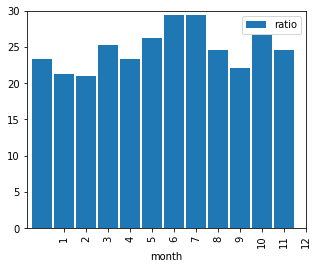

In [35]:
ax = df_seasons.plot(x='month',
                      y='ratio',
                      kind='bar',
                      figsize=(5, 4),
                      width=0.9)

ax.set_yticks([0, 5, 10, 15, 20, 25, 30])
ax.set_ylim(0,30)
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
# plt.savefig('delays2018sample.pdf')

## Summer delays 2018

In [36]:
df_summer = df2[(df2.month == 6) | (df2.month == 7) | (df2.month == 8)]

In [37]:
df_summer.head()

,year,month,carrier_name,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,seasons,ratio_delays
1547,2018,6,Endeavor Air Inc.,JFK,2210.0,457.0,80.11,16.41,217.25,0.00,...,16.0,0.0,36100.0,8089.0,1395.0,14785.0,0.0,11831.0,summer,20.678733
1548,2018,6,American Airlines Inc.,JFK,1487.0,301.0,74.74,27.51,110.02,0.15,...,15.0,1.0,20280.0,5295.0,1980.0,5001.0,5.0,7999.0,summer,20.242098
1550,2018,6,JetBlue Airways,JFK,3631.0,908.0,207.65,19.22,330.63,2.08,...,49.0,11.0,60861.0,12996.0,1310.0,18643.0,55.0,27857.0,summer,25.006885
1551,2018,6,Delta Air Lines Inc.,JFK,2648.0,534.0,140.30,31.66,240.70,1.98,...,0.0,5.0,42802.0,13229.0,3365.0,13247.0,134.0,12827.0,summer,20.166163
1553,2018,6,Envoy Air,JFK,519.0,119.0,21.94,4.50,43.14,0.00,...,30.0,1.0,7553.0,1558.0,210.0,2483.0,0.0,3302.0,summer,22.928709


In [38]:
summer_ratio=pd.DataFrame(df_summer.groupby(by='carrier_name').arr_delay.median().sort_values(ascending=False))

In [39]:
summer_ratio=summer_ratio.reset_index()

In [40]:
summer_ratio.dtypes

carrier_name     object
arr_delay       float64
dtype: object

## Worst performing airlines

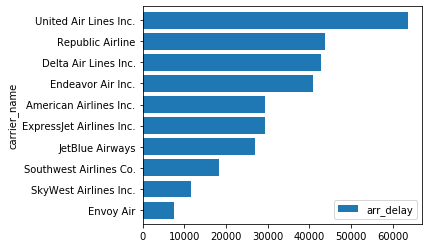

In [41]:
ax2 = summer_ratio.sort_values(by='arr_delay').plot(x='carrier_name',
                        y='arr_delay',
                        kind='barh',
                        figsize=(5, 4),
                        width=0.8)

# ax.set_yticks([15, 20, 25, 30])
# ax.set_ylim(15,30)
# ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
# plt.savefig('worstairlines2018.pdf')

# June 2018, 2019

In [42]:
june = pd.read_excel("junedelays.xlsx")

In [43]:
newark = june[(june['Airport']== 'NWR')].sort_values(by='Year')

In [44]:
jfk = june[(june['Airport']== 'JFK')].sort_values(by='Year')

In [45]:
lga = june[(june['Airport']== 'LGA')].sort_values(by='Year')

In [46]:
newark.head()

,Year,Ontime Arrivals,Arrival Ontime (%),Arrival Delays,Arrival Delayed (%),Arrival Flights Cancelled,Arrival Cancelled (%),Arrival Diverted,Arrival Flight Operations,Ontime Departures,Departure Ontime (%),Departure Delays,Departure Delayed (%),Departure Flights Cancelled,Departure Cancelled (%),Departure Flight Operations,Airport
21,2010,6964,0.7301,2352,0.2466,172,0.0180,50,9538,7255,0.7608,2111,0.2214,170,0.0178,9536,NWR
4,2011,6182,0.6366,3201,0.3296,274,0.0282,54,9711,6906,0.7115,2524,0.2600,276,0.0284,9706,NWR
13,2012,6792,0.6852,2926,0.2952,172,0.0174,23,9913,6724,0.6851,2917,0.2972,174,0.0177,9815,NWR
3,2013,6229,0.6132,3416,0.3363,411,0.0405,103,10159,6674,0.6559,3109,0.3056,392,0.0385,10175,NWR
9,2014,6383,0.6570,2950,0.3036,357,0.0367,26,9716,6525,0.6730,2861,0.2951,310,0.0320,9696,NWR


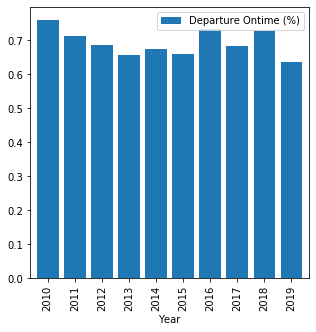

In [47]:
ax = newark.sort_values(by='Year').plot(x='Year',
                        y=['Departure Ontime (%)'],
                        kind='bar',
                        figsize=(5, 5),
                        stacked=True,
                        width=0.8)
# plt.savefig('newarkjune.pdf')

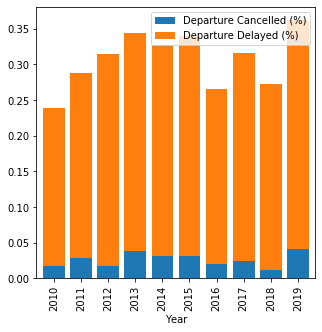

In [48]:
ax2 = newark.sort_values(by='Year').plot(x='Year',
                        y=['Departure Cancelled (%)', 'Departure Delayed (%)'],
                        kind='bar',
                        figsize=(5, 5),
                        stacked=True,
                        width=0.8)

# plt.savefig('newarkdelayed.pdf')

# Slope graph specific airlines

In [49]:
df=df.reset_index()

In [50]:
df.head()

,index,year,month,carrier_name,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,seasons,ratio_delays
0,1156,2014,1,American Airlines Inc.,JFK,1139.0,233.0,68.65,11.21,78.74,...,74.0,13.0,15754.0,3957.0,1575.0,3431.0,0.0,6791.0,winter,20.456541
1,1157,2014,1,JetBlue Airways,JFK,3342.0,1010.0,289.30,27.47,235.20,...,438.0,29.0,88507.0,22678.0,4308.0,14623.0,77.0,46821.0,winter,30.221424
2,1158,2014,1,Delta Air Lines Inc.,JFK,1637.0,411.0,117.63,27.13,165.08,...,96.0,24.0,39000.0,11001.0,7169.0,11161.0,0.0,9669.0,winter,25.106903
3,1161,2014,1,ExpressJet Airlines Inc.,JFK,104.0,37.0,8.19,2.00,12.88,...,15.0,1.0,2253.0,392.0,155.0,659.0,0.0,1047.0,winter,35.576923
4,1162,2014,1,United Air Lines Inc.,JFK,410.0,88.0,31.17,3.00,35.84,...,22.0,4.0,6021.0,1622.0,855.0,1909.0,0.0,1635.0,winter,21.463415


In [51]:
slopegraph = df[(df.year == 2014) | (df.year == 2018)]

In [52]:
slopegraph = pd.DataFrame(slopegraph.groupby(by=['carrier_name', 'year']).ratio_delays.median())

In [53]:
slopegraph = slopegraph.reset_index()

In [54]:
slopegraph.to_csv('slopegraph.csv')

In [55]:
slopegraph.head()

,carrier_name,year,ratio_delays
0,American Airlines Inc.,2014,22.539353
1,American Airlines Inc.,2018,23.284150
2,Delta Air Lines Inc.,2014,20.951664
3,Delta Air Lines Inc.,2018,20.935795
4,Endeavor Air Inc.,2018,23.195005


In [ ]:
slopegraph['difference'] = slopegraph[ratio_delays]

In [71]:
dumbbell = df[(df.year == 2014) | (df.year == 2018)]

In [72]:
dumbbell = pd.DataFrame(dumbbell.groupby(by=['carrier_name', 'year']).arr_del15.mean())

In [73]:
dumbbell = dumbbell.reset_index()

In [74]:
dumbbell.head()

,carrier_name,year,arr_del15
0,American Airlines Inc.,2014,195.138889
1,American Airlines Inc.,2018,300.111111
2,Delta Air Lines Inc.,2014,305.833333
3,Delta Air Lines Inc.,2018,319.166667
4,Endeavor Air Inc.,2018,312.305556


In [75]:
dumbbell.to_csv('dumbbell2.csv')

In [76]:
dumbbell = pd.read_csv("dumbbell.csv")

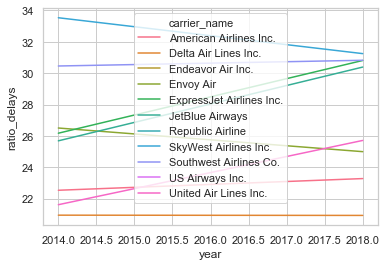

In [156]:
sns.lineplot(x="year", y="ratio_delays",
             hue="carrier_name",
             data=slopegraph)
# plt.savefig('slope.pdf')

In [39]:
df.head()

,year,month,carrier_name,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,seasons,ratio_delays
1156,2014,1,American Airlines Inc.,JFK,1139.0,233.0,68.65,11.21,78.74,0.00,...,74.0,13.0,15754.0,3957.0,1575.0,3431.0,0.0,6791.0,winter,20.456541
1157,2014,1,JetBlue Airways,JFK,3342.0,1010.0,289.30,27.47,235.20,1.43,...,438.0,29.0,88507.0,22678.0,4308.0,14623.0,77.0,46821.0,winter,30.221424
1158,2014,1,Delta Air Lines Inc.,JFK,1637.0,411.0,117.63,27.13,165.08,0.00,...,96.0,24.0,39000.0,11001.0,7169.0,11161.0,0.0,9669.0,winter,25.106903
1161,2014,1,ExpressJet Airlines Inc.,JFK,104.0,37.0,8.19,2.00,12.88,0.00,...,15.0,1.0,2253.0,392.0,155.0,659.0,0.0,1047.0,winter,35.576923
1162,2014,1,United Air Lines Inc.,JFK,410.0,88.0,31.17,3.00,35.84,0.00,...,22.0,4.0,6021.0,1622.0,855.0,1909.0,0.0,1635.0,winter,21.463415
